In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D 
from dataclasses import dataclass
import seaborn as sns

C:\Users\akshi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_excel("Lab3_data.xls", sheet_name="2004--2005 Data")

In [3]:
data.head()

,y,x1,x2
0,1,71,140
1,1,74,185
2,1,70,145
3,1,67,145
4,1,72,170


In [4]:
data.iloc[0]

y       1
x1     71
x2    140
Name: 0, dtype: int64

In [5]:
data.iloc[38]

y       0
x1     71
x2    150
Name: 38, dtype: int64

In [7]:
class LogisticRegression:
    def __init__(self, learning_rate,tolerance, max_iteration, removeIndex=[]):
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.max_iteration = max_iteration
        self.removeIndex = removeIndex
        
    def data_reader(self):
        train_df = pd.read_excel('Lab3_data.xls', sheet_name = '2004--2005 Data')
        test_df = pd.read_excel('Lab3_data.xls', sheet_name = '2004--2007 Data')
        
        train_df = self.remove_index(train_df)
        
        train_df = train_df.values
        test_df = test_df.values
        
        self.X_train, self.y_train = train_df[:, 1:], train_df[:, 0]
        self.X_test, self.y_test = test_df[:, 1], test_df[:, 0]
        
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def sigmoid(self,z):
        return (1/(1+ np.exp(-z)))

    def cost_function(self, X, y):
        sig= self.sigmoid(X.dot(self.w))
        cost= (y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)))
        cost= -cost.sum()
        return cost
    
    def gradient(self, X, y): 
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        return grad 
    
    def gradient_descent(self,X,y):
        errors = [] 
        last_error = float('inf')
        
        for i in  tqdm(range(self.max_iteration), colour='blue'):
            self.w = self.w - self.learning_rate * self.gradient(X, y)
            
            curr_err = self.cost_function(X,y)
            diff = last_error - curr_err
            last_error = curr_err
            
            errors.append(last_error)
            
            if diff < self.tolerance: 
                print("Model has stopped learning")
                break 
                
        self.plot_cost(errors)
           
    def predict(self, X): 
        sig = self.sigmoid(X.dot(self.w))
        return np.round(sig)
    
    def evaluate(self,y,y_hat):

        y = (y==1)
        y_hat = (y_hat ==1)
        
        accuracy= (y==y_hat).sum()/len(y)
        precision = (y & y_hat).sum()/y_hat.sum()
        recall = (y*y_hat).sum()/y.sum()
        
        f1_score = 2*(precision*recall)/(precision+recall)
        
        return accuracy, precision, recall, f1_score

        
    
    def remove_index(self, df):
        adjusted_indexes = [index - 1 for index in self.removeIndex]  # Subtracting 1 from each index to get exact index
        if adjusted_indexes:  
            df = df.drop(index=adjusted_indexes)
            print("Adjusted indexes removed:", adjusted_indexes)
        return df
    
 
    
    def fit(self):
        X_train, X_test, y_train, y_test = self.data_reader()           
        self.w = np.ones(X_train.shape[1], dtype = np.float64)*0

        self.gradient_descent(X_train,y_train)
#         print(self.w)
        y_hat_train = self.predict(X_train)
        accuracy, precision, recall, f1_score = self.evaluate(y_train, y_hat_train)

        print("Accuracy: ", round(accuracy*100,2))
        print("Precision: ", round(precision*100,2))
        print('Recall: ', round(recall*100,2))
        print("F1_score: ", round(f1_score*100,2))

        self.plot(X_train, y_train)
        self.scatterPlt(X_train, y_train)
        self.plot3D(X_train, y_train)
          
            
   #---------------------------------------Plotting functions-------------------------------------------------------         
                
    def plot(self, X_train, y_train):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)
    
    def scatterPlt(self, X_train, y_train):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(10,8))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        
    def plot3D(self, X_train, y_train):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(10,8))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()
        
    def plot_cost(self, cost_sequence):
        # Data for plotting
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel='cost',
               title='Errors plot')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()           

In [8]:
lr1 = LogisticRegression(learning_rate = 0.000001, tolerance = 0.00001, max_iteration = 50000, removeIndex=[])

 81%|███████████████████████████████████████████████████████████              | 40444/50000 [00:00<00:00, 55266.12it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Model has stopped learning


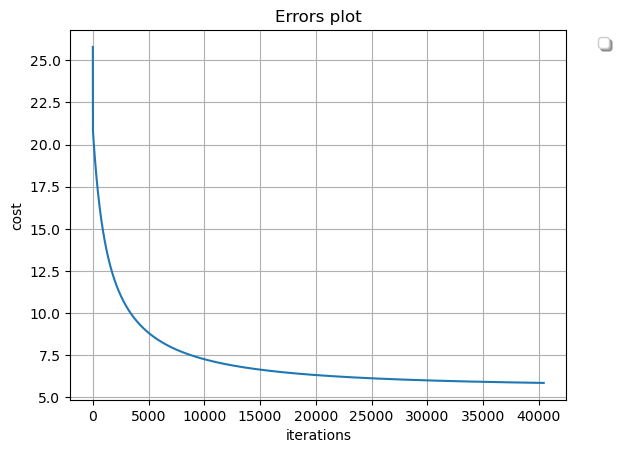

Accuracy:  95.65
Precision:  97.22
Recall:  97.22
F1_score:  97.22


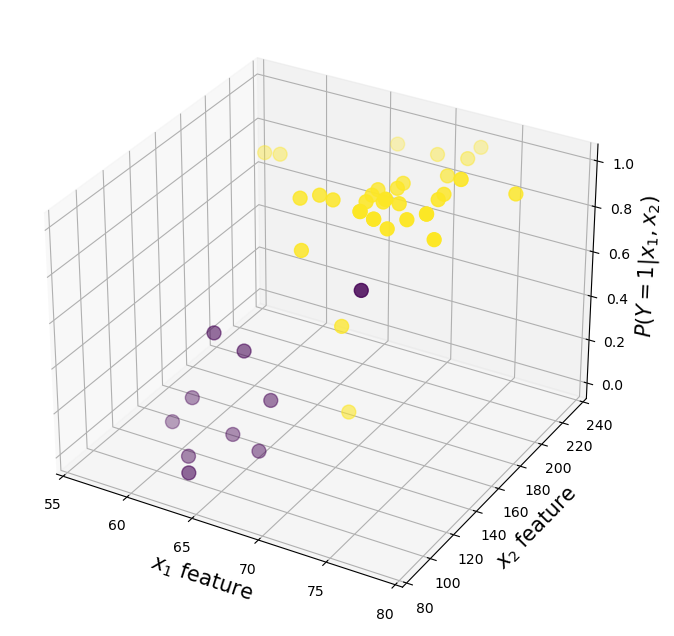

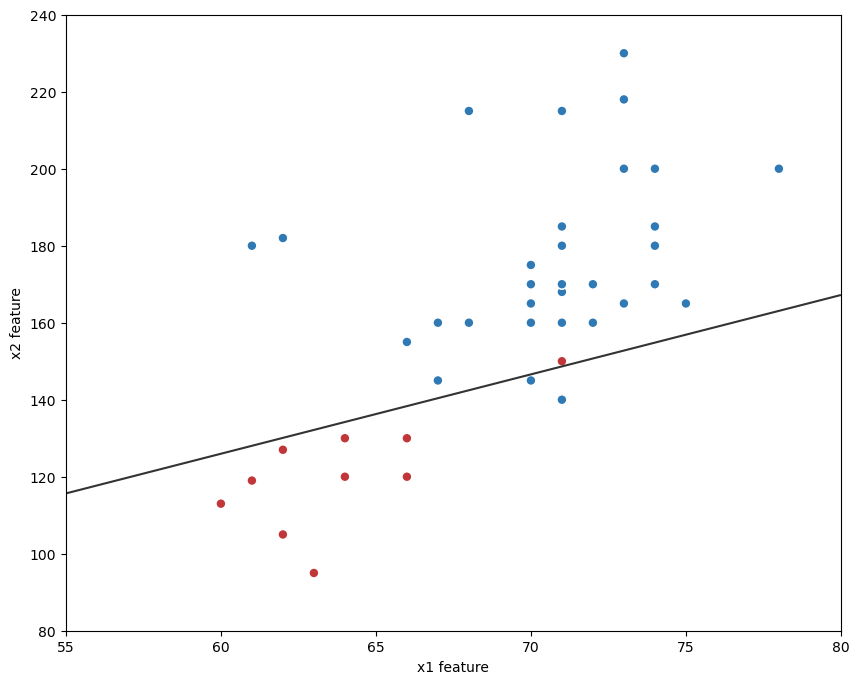

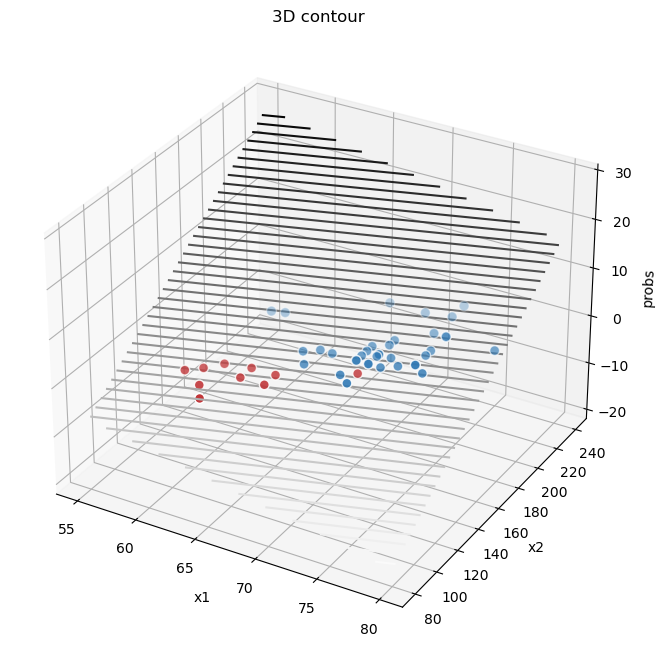

In [9]:
lr1.fit()

In [10]:
lr2 = LogisticRegression(learning_rate = 0.00001, tolerance = 0.00001, max_iteration = 100000, removeIndex=[1,39])

Adjusted indexes removed: [0, 38]


 30%|█████████████████████▉                                                  | 30452/100000 [00:00<00:01, 57911.81it/s]C:\Users\akshi\AppData\Local\Temp\ipykernel_23612\845799876.py:27: RuntimeWarning: divide by zero encountered in log
  cost= (y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)))
100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:01<00:00, 54519.54it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


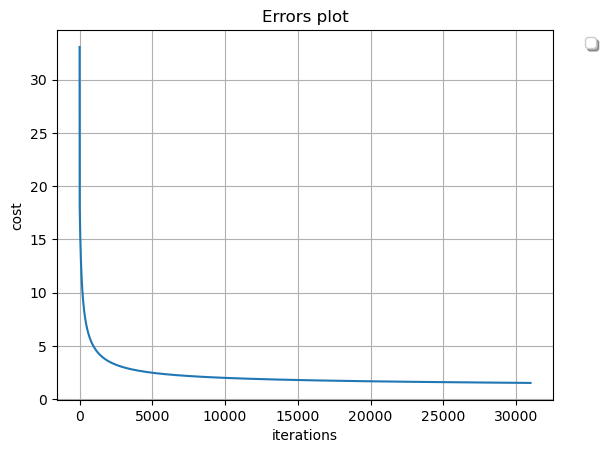

Accuracy:  100.0
Precision:  100.0
Recall:  100.0
F1_score:  100.0


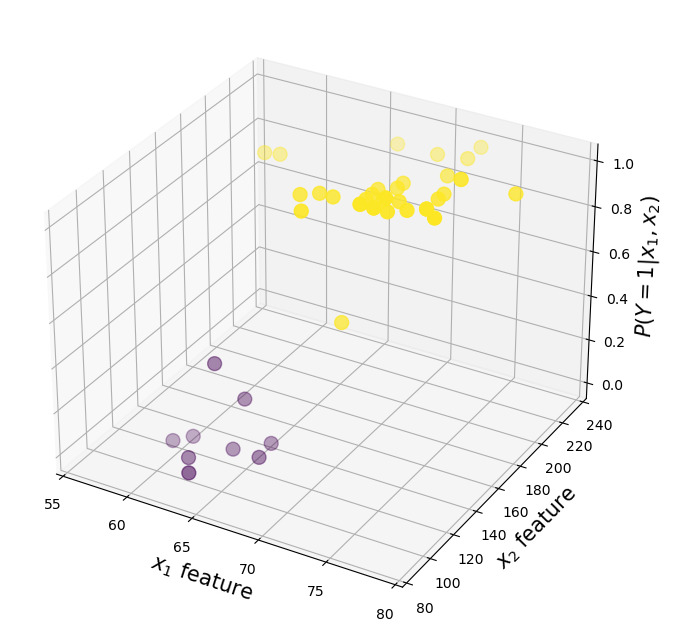

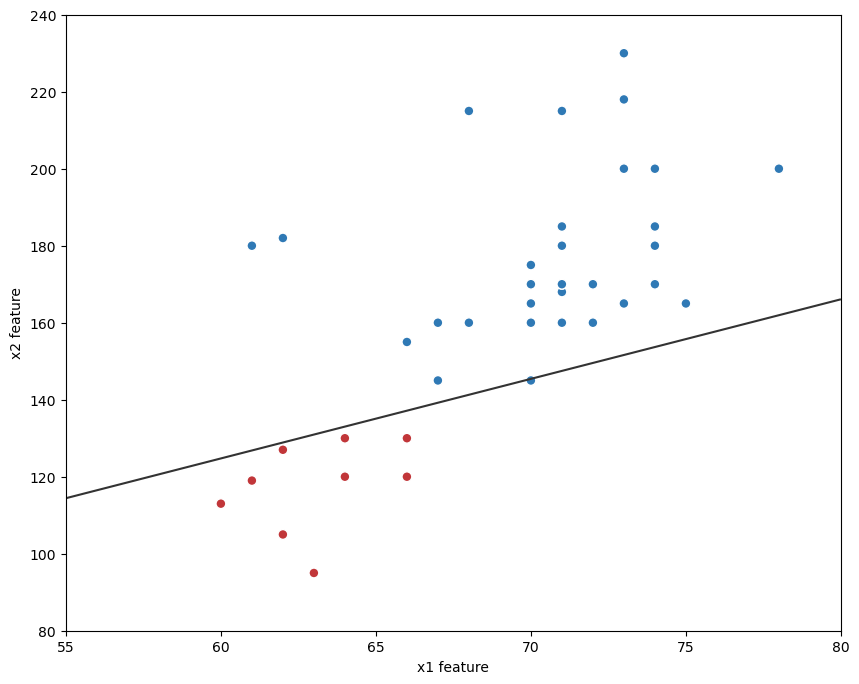

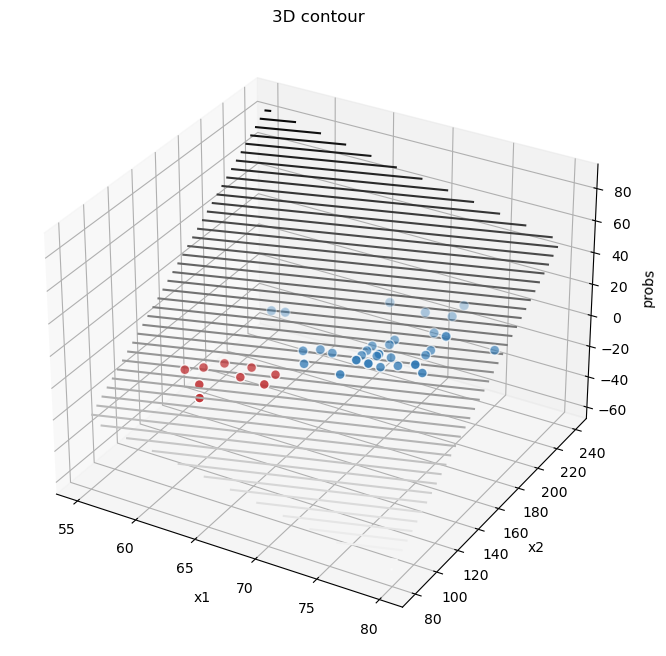

In [11]:
lr2.fit()

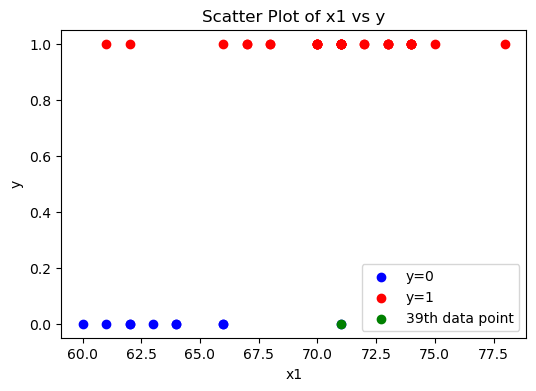

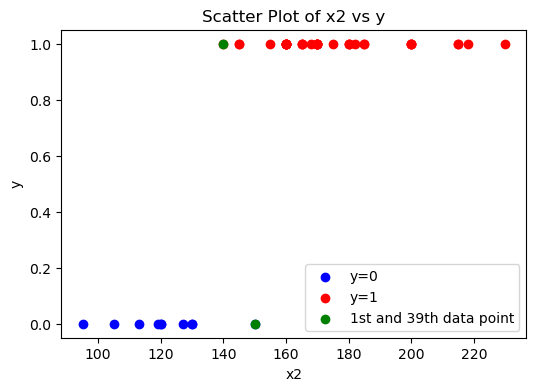

In [12]:
plt.figure(figsize=(6, 4))
plt.scatter(data[data['y'] == 0]['x1'], data[data['y'] == 0]['y'], color='blue', label='y=0')
plt.scatter(data[data['y'] == 1]['x1'], data[data['y'] == 1]['y'], color='red', label='y=1')

plt.scatter(data.loc[[38], 'x1'], data.loc[[38], 'y'], color='green',label='39th data point')

plt.xlabel('x1')
plt.ylabel('y')
plt.title('Scatter Plot of x1 vs y')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(data[data['y'] == 0]['x2'], data[data['y'] == 0]['y'], color='blue', label='y=0')
plt.scatter(data[data['y'] == 1]['x2'], data[data['y'] == 1]['y'], color='red', label='y=1')

plt.scatter(data.loc[[0,38], 'x2'], data.loc[[0,38], 'y'], color='green',label='1st and 39th data point')

plt.xlabel('x2')
plt.ylabel('y')
plt.title('Scatter Plot of x2 vs y')
plt.legend()
plt.show()

When we removed points 1 and 39 from the dataset, observed that there were almost no misclassifications in the model's predictions. We saw the model had a better overall accuracy, precision, recall and f1-score compared to before.

This indicates that these were outliers and had a significant impact on the model's performance. 